### Глубокое обучение в компьютерном зрении. Урок 1.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [2]:
img = imageio.imread('fish.jpg')
#img = img[:,:,0].astype(np.float32) / 255.
print(img.shape)

(800, 1280, 3)


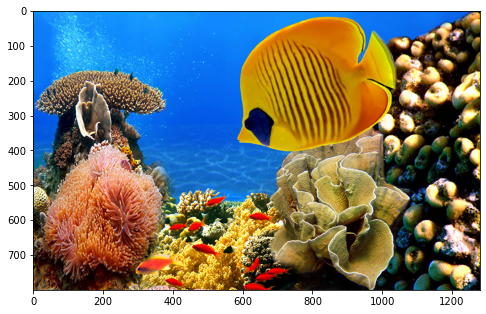

In [3]:
plt.figure(figsize=(8, 13))
plt.imshow(img)

In [4]:
from skimage.color import rgb2hsv, hsv2rgb

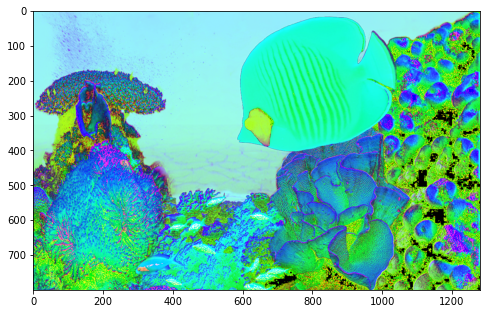

In [5]:
# Перевод в другое цветовое пространство (RGB -> HSV)
img_hsv = rgb2hsv(img)
#img_hsv = img_hsv[:,:,0].astype(np.float32) / 255.
plt.figure(figsize=(8, 13))
plt.imshow(img_hsv)

In [6]:
# Линейное уменьшение насыщенности в 2 раза
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv_new)

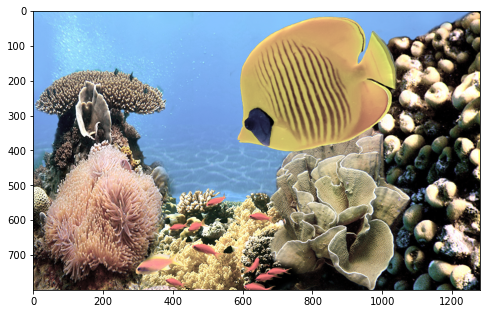

In [7]:
plt.figure(figsize=(8, 13))
plt.imshow(img_new)

In [8]:
# Изменение тона
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] **= 1.3
img_new = hsv2rgb(img_hsv_new)

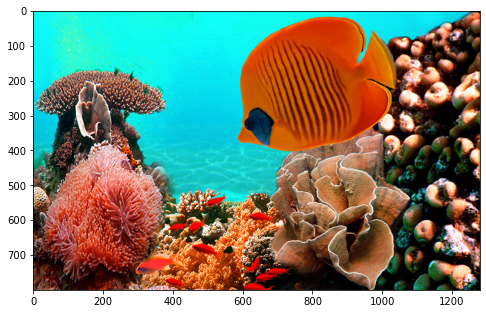

In [9]:
plt.figure(figsize=(8, 13))
plt.imshow(img_new)

In [10]:
import scipy.signal

In [11]:
# Размытие - Gaussian blur
win_size = (21, 21)
sigma = 6
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                        -(j-w.shape[1]//2)**2 / sigma**2 / 2)
# Ядро свёртки
w = w / np.sum(w)

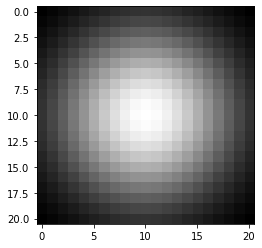

In [12]:
plt.imshow(w, cmap='gray')

In [13]:
img = imageio.imread('fish.jpg')
img = img.astype(np.float32) / 255.

In [14]:
%%time
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

Wall time: 2.65 s


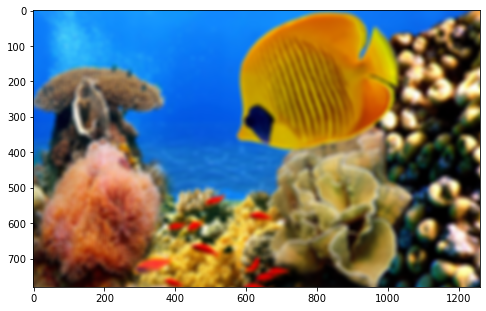

In [15]:
plt.figure(figsize=(8, 13))
plt.imshow(out_img)

In [16]:
win_size = (3, 3)
w = np.zeros(win_size, dtype=np.float32)
w

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [17]:
# фильтр Собеля для обнаружения контуров
w[0] = [1, 0, -1]
w[1] = [2, 0, -2]
w[2] = [1, 0, -1]
w

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]], dtype=float32)

In [18]:
%%time
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

Wall time: 96.5 ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


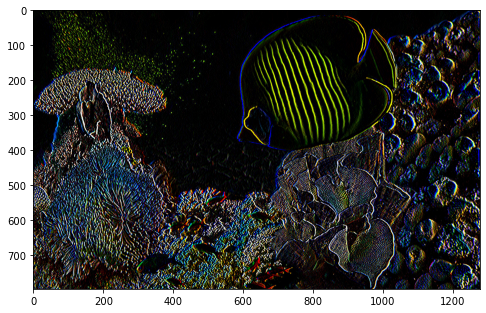

In [19]:
plt.figure(figsize=(8, 13))
plt.imshow(out_img)